In [1]:
import pandas as pd

from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from textblob import Word
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

In [2]:
csv_bbc_news=pd.read_csv("bbc-news-data.csv", sep="\t")

In [3]:
csv_bbc_news.shape

(2225, 4)

In [4]:
csv_bbc_news.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [5]:
csv_bbc_news['category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [6]:
csv_bbc_news['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [7]:
csv_bbc_news_new=pd.DataFrame(csv_bbc_news,columns=['category','content'])
csv_bbc_news_new['content']=csv_bbc_news_new['content'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
csv_bbc_news_new['content']=csv_bbc_news_new['content'].str.replace('[^\w\s]','')
csv_bbc_news_new['content']=csv_bbc_news_new['content'].str.replace('\d','')
sw = stopwords.words('english')
csv_bbc_news_new['content']=csv_bbc_news_new['content'].apply(lambda x: ' '.join(x for x in x.split() if x not in sw))
nltk.download('wordnet')
nltk.download('omw-1.4')
csv_bbc_news_new['content']=csv_bbc_news_new['content'].apply(lambda x: ' '.join([Word(i).lemmatize() for i in x.split()]))

C:\Users\Furkan ICOZ\AppData\Local\Temp\ipykernel_1332\54203208.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  csv_bbc_news_new['content']=csv_bbc_news_new['content'].str.replace('[^\w\s]','')
C:\Users\Furkan ICOZ\AppData\Local\Temp\ipykernel_1332\54203208.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  csv_bbc_news_new['content']=csv_bbc_news_new['content'].str.replace('\d','')
[nltk_data] Downloading package wordnet to C:\Users\Furkan
[nltk_data]     ICOZ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Furkan
[nltk_data]     ICOZ\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [8]:
csv_bbc_news_new=csv_bbc_news_new.dropna()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(csv_bbc_news_new['content'], csv_bbc_news_new['category'], test_size = 0.2,random_state=42)

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
mnb =  Pipeline([('vect', CountVectorizer()),
             ('tfidf', TfidfTransformer()),
               ('mnb', MultinomialNB()),
                ])

In [12]:
model = mnb.fit(X_train,y_train)

In [13]:
model.score(X_test,y_test)

0.9617977528089887

In [14]:
y_pred=model.predict(X_test)

In [15]:
y_pred[:10]

array(['business', 'business', 'sport', 'business', 'politics', 'sport',
       'sport', 'politics', 'sport', 'politics'], dtype='<U13')

In [16]:
model.predict(X_test)[:10]

array(['business', 'business', 'sport', 'business', 'politics', 'sport',
       'sport', 'politics', 'sport', 'politics'], dtype='<U13')

In [17]:
y_test[:10]

414          business
420          business
1644            sport
416          business
1232         politics
1544            sport
1748            sport
1264         politics
629     entertainment
1043         politics
Name: category, dtype: object

In [18]:
X_test[629]

'mark th anniversary birth reggae star bob marley rob partridge marley former head press island record remembers man behind legend partridge worked marley jamaican musician death joined island record first week worked show rainbow theatre one last date london album exodus came provided five hit confirmed global superstar status biggest touring attraction world remember going see date milan turin enormous concert bob one mesmeric people ive ever privilege work must iron succeed bob driven individual realised start manifest destiny within believed didnt suffer fool gladly risk stating obvious extraordinary song writer stage act perhaps greatest ive ever seen saw many time recall came uk top pop daily mirror journalist halfhour interview interrupted rehearsal came back dressing room resume interview saw world cup match tv sat front tv minute obvious wasnt going move end mirror truncated interview last time saw london arranged play four day football indoors fulham bob good player talking j

In [19]:
accuracy_score(y_test,y_pred)

0.9617977528089887

In [20]:
confusion_matrix(y_test,y_pred)

array([[109,   0,   4,   0,   2],
       [  1,  65,   4,   1,   1],
       [  1,   0,  74,   0,   1],
       [  1,   0,   0, 101,   0],
       [  0,   1,   0,   0,  79]], dtype=int64)

In [21]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

     business       0.97      0.95      0.96       115
entertainment       0.98      0.90      0.94        72
     politics       0.90      0.97      0.94        76
        sport       0.99      0.99      0.99       102
         tech       0.95      0.99      0.97        80

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



In [22]:
def preprocess(news_text):
    news_text=pd.Series([news_text])
    news_text=news_text.apply(lambda x: ' '.join(x.lower() for x in x.split()))
    news_text=news_text.replace('[^\w\s]','')
    news_text=news_text.replace('\d','')
    sw = stopwords.words('english')
    news_text=news_text.apply(lambda x: ' '.join(x for x in x.split() if x not in sw))
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    news_text=news_text.apply(lambda x: ' '.join([Word(i).lemmatize() for i in x.split()]))
    return news_text

In [24]:
asdsd=preprocess("Canada dominated large portions of this Group F game but were wasteful in front of goal, particularly when Alphonso Davies saw a first-half penalty saved by Belgium keeper Thibaut Courtois.Courtois also had to save well from Alistair Johnston, but Canada were undone against the run of play on the stroke of half-time when Michy Batshuayi collected Toby Alderweireld's long ball and fired a powerful left-foot finish past Milan Borjan.Jonathan David wasted a glorious headed chance to draw Canada level and Courtois also saved from Cyle Larin. Canada were also left nursing a sense of injustice after they had two presentable penalty appeals ignored in the first half.Canada continued to push forward in the second half but it was Roberto Martinez's side who closed out the win, despite a performance that made a mockery of their status as second in the world rankings.Canada deserved to be better than us in the way they played, Martinez told Match of the Day. Its a win and we need to play better and to grow.This tournament is going to make you develop and grow as the tournament goes on. If you do that by winning games, its an incredible advantage.Today we didnt win by our normal talent and quality on the ball, but you dont win in the World Cup if you dont do the other side of the game.")
asdsd[0]

[nltk_data] Downloading package wordnet to C:\Users\Furkan
[nltk_data]     ICOZ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Furkan
[nltk_data]     ICOZ\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


"canada dominated large portion group f game wasteful front goal, particularly alphonso davy saw first-half penalty saved belgium keeper thibaut courtois.courtois also save well alistair johnston, canada undone run play stroke half-time michy batshuayi collected toby alderweireld's long ball fired powerful left-foot finish past milan borjan.jonathan david wasted glorious headed chance draw canada level courtois also saved cyle larin. canada also left nursing sense injustice two presentable penalty appeal ignored first half.canada continued push forward second half roberto martinez's side closed win, despite performance made mockery status second world rankings.canada deserved better u way played, martinez told match day. win need play better grow.this tournament going make develop grow tournament go on. winning games, incredible advantage.today didnt win normal talent quality ball, dont win world cup dont side game."

In [25]:
test_new_bbc_a="Security restrictions on liquids and laptops in airport hand luggage could be axed in the UK within two years thanks to high-tech 3D scanners.The government is considering rolling out the more advanced scanners by mid-2024, a source told the BBC, although a final decision has yet to be made.The equipment, similar to CT scanners used in hospitals, provides a clearer picture of a bag's contents.A previous installation deadline slipped due to the pandemic.The Times newspaper reported that ministers have been carrying out a review and an announcement is due before Christmas, with the hope it could cut down on queues in UK airports.Passengers carrying liquid in their cabin baggage are currently restricted to containers holding no more than 100ml. These must be shown to security staff in a single, transparent, resealable plastic bag, which holds no more than a litre and measures about 20cm (8in) by 20cm.Those limits have been in place since November 2006. Their introduction ended a ban on liquids in the cabin imposed three months earlier, when British police said they had foiled a plot to blow up as many as 10 planes using explosives hidden in drinks bottles.But the new technology enables staff to zoom in on a bag's contents and rotate the images for inspection."

In [26]:
test_new_bbc_a=preprocess(test_new_bbc_a)

[nltk_data] Downloading package wordnet to C:\Users\Furkan
[nltk_data]     ICOZ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Furkan
[nltk_data]     ICOZ\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [27]:
model.predict([test_new_bbc_a[0]])

array(['business'], dtype='<U13')

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix



C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


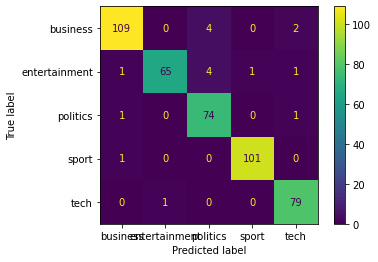

In [29]:
plot_confusion_matrix(mnb, X_test, y_test)  
plt.show()

In [34]:
test1="Cryptocurrency firms Gemini and Genesis have been charged by US regulators with illegally selling crypto assets to hundreds of thousands of investors.The companies are accused of breaking the law by offering and selling the products through their joint programme, Gemini Earn, which launched in 2021.The Securities and Exchange Commission (SEC) is in charge of the case.Gemini was co-founded by twins Tyler and Cameron Winklevoss - known for their legal dispute with Facebook.Tyler called the complaint 'disappointing', and said his company looks forward to defending itself.Genesis, which is owned by the crypto conglomerate Digital Currency Group, has so far not commented on the charges."
test1=preprocess(test1)
model.predict([test1[0]])

[nltk_data] Downloading package wordnet to C:\Users\Furkan
[nltk_data]     ICOZ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Furkan
[nltk_data]     ICOZ\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


array(['business'], dtype='<U13')